In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt

In [ ]:
!pwd

/content


In [ ]:
url = './merged_datasets.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,index,area,building_type,building_nature,image_url,num_bath_rooms,num_bed_rooms,price,property_description,property_overview,...,address,id,garage,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count
0,0,1185.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,0.0,3.0,6100000.0,Grab This 1185 Sq Ft Beautiful Flat Is Vacant ...,This flat consists of facilities you can think...,...,NaN,bproperty-0,0.0,0,1,2,0,2,0.0,3.0
1,1,2464.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,4.0,3.0,28900000.0,A Vibrant 2464 Sq Ft Residential Flat For Sale...,Ready to move in somewhere with everything nea...,...,NaN,bproperty-1,0.0,0,2,0,0,3,0.0,4.0
2,2,1140.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,0.0,3.0,7500000.0,1140 Sq Ft Nicely Planned Apartment Is Availab...,A spacious 1140 Square Feet apartment in Mirp...,...,"Block Ta, Section 6",bproperty-2,0.0,0,2,2,0,2,0.0,4.0
3,3,1920.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,20000000.0,A Modern Well-planned Apartment Of 1920 Sq Ft ...,Looking for the perfect home that offers a lux...,...,Block J,bproperty-3,0.0,0,1,2,0,3,0.0,3.0
4,4,1445.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,10800000.0,"1445 Sq Ft Ready Flat For Sale In Banasree, Wi...",Choosing a new home can be an overwhelming exp...,...,"Block M, South Banasree Project",bproperty-4,0.0,0,0,2,0,1,0.0,4.0


# Question 10

# a) What are the outliers in terms of the price (and also other variables, e.g. num_bath_rooms)?




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26679 entries, 0 to 26678
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   index                                  26679 non-null  int64  
 1   area                                   26679 non-null  float64
 2   building_type                          26679 non-null  object 
 3   building_nature                        26679 non-null  object 
 4   image_url                              17265 non-null  object 
 5   num_bath_rooms                         26679 non-null  float64
 6   num_bed_rooms                          26679 non-null  float64
 7   price                                  26679 non-null  float64
 8   property_description                   17653 non-null  object 
 9   property_overview                      17290 non-null  object 
 10  property_url                           26679 non-null  object 
 11  pu

In [ ]:
df.isnull().sum()

index                                       0
area                                        0
building_type                               0
building_nature                             0
image_url                                9414
num_bath_rooms                              0
num_bed_rooms                               0
price                                       0
property_description                     9026
property_overview                        9389
property_url                                0
purpose                                     0
city                                        0
locality                                    0
address                                  4868
id                                          0
garage                                      0
relaxation_amenity_count                    0
security_amenity_count                      0
maintenance_or_cleaning_amenity_count       0
social_amenity_count                        0
expendable_amenity_count          

In [ ]:
df_cropped = df[['area', 'num_bath_rooms', 'num_bed_rooms', 'price', 'purpose', 'garage']]

In [ ]:
df_cropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26679 entries, 0 to 26678
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            26679 non-null  float64
 1   num_bath_rooms  26679 non-null  float64
 2   num_bed_rooms   26679 non-null  float64
 3   price           26679 non-null  float64
 4   purpose         26679 non-null  object 
 5   garage          26679 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.2+ MB


In [ ]:
df_cropped.isnull().sum()

area              0
num_bath_rooms    0
num_bed_rooms     0
price             0
purpose           0
garage            0
dtype: int64

In [ ]:
# Amount that have value zero
zero_area = (df_cropped['area'] == 0).sum()
zero_baths = (df_cropped['num_bath_rooms'] == 0).sum()
zero_beds = (df_cropped['num_bed_rooms'] == 0).sum()
zero_garage = (df_cropped['garage'] == 0).sum()

print("area:", zero_area)
print("num_bath_rooms:", zero_baths)
print("num_bed_rooms:", zero_beds)
print("garage:", zero_garage)

area: 1
num_bath_rooms: 13277
num_bed_rooms: 6483
garage: 26679


In [ ]:
df_cropped.count()

area              26679
num_bath_rooms    26679
num_bed_rooms     26679
price             26679
purpose           26679
garage            26679
dtype: int64

In [ ]:
# Missing Data
total = df_cropped.isnull().sum().sort_values(ascending = False)
percent = (df_cropped.isnull().sum()/df_cropped.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
area,0,0.0
num_bath_rooms,0,0.0
num_bed_rooms,0,0.0
price,0,0.0
purpose,0,0.0
garage,0,0.0


In [ ]:
df_cropped.describe()

,area,num_bath_rooms,num_bed_rooms,price,garage
count,26679.000000,26679.000000,26679.000000,2.667900e+04,26679.0
mean,2064.723835,1.497882,2.295738,1.348160e+09,0.0
std,4183.477894,1.659884,1.981327,1.481478e+11,0.0
min,0.000000,0.000000,0.000000,0.000000e+00,0.0
25%,1100.000000,0.000000,1.000000,4.200000e+04,0.0
50%,1450.000000,1.000000,3.000000,6.790000e+05,0.0
75%,2166.000000,3.000000,3.000000,7.005250e+06,0.0
max,296600.000000,26.000000,94.000000,2.400000e+13,0.0


In [ ]:
# Function for calculating lower and upper boundaries for outliers
def get_boundaries(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    boundaries = {"lower": lower_bound, "upper": upper_bound}
    return boundaries

In [ ]:
# List of columns to get outliers for
columns = ['area', 'num_bath_rooms', 'num_bed_rooms', 'price', 'garage']

# Dictionary to store boundaries for each column
boundaries_dict = {}
  
# Get boundaries for each column
for column in columns:
  boundaries = get_boundaries(df, column)
  boundaries_dict[column] = boundaries
    
# Print boundaries for each column
for column, boundaries in boundaries_dict.items():
  print(f"{column}: lower={boundaries['lower']}, upper={boundaries['upper']}")


area: lower=-499.0, upper=3765.0
num_bath_rooms: lower=-4.5, upper=7.5
num_bed_rooms: lower=-2.0, upper=6.0
price: lower=-10402875.0, upper=17450125.0
garage: lower=0.0, upper=0.0


Lower boundaries are negative for area, num_bath_rooms, and price, for garage it´s zero, so they are not relevant to plot. 




In [ ]:
# Upper boundary variables for plotting in each column
boundary_area = boundaries_dict['area']['upper']
boundary_num_bath_rooms = boundaries_dict['num_bath_rooms']['upper']
boundary_num_bed_rooms = boundaries_dict['num_bed_rooms']['upper']
boundary_price = boundaries_dict['price']['upper']
boundary_garage = boundaries_dict['garage']['upper']

In [ ]:
# Amount of outliers for each column
outlier_area_count = 0
outlier_num_bath_rooms_count = 0
outlier_num_bed_rooms_count = 0
outlier_price_count = 0

for column in columns:
    boundaries = get_boundaries(df, column)
    outliers = df[(df[column] < boundaries['lower']) | (df[column] > boundaries['upper'])]
    count = len(outliers)
    print(f"{column}: {count} outliers")
    if column == 'area':
        outlier_area_count = count
    elif column == 'num_bath_rooms':
        outlier_num_bath_rooms_count = count
    elif column == 'num_bed_rooms':
        outlier_num_bed_rooms_count = count
    elif column == 'price':
        outlier_price_count = count
    elif column == 'garage':
        outlier_garage_count = count


area: 1941 outliers
num_bath_rooms: 68 outliers
num_bed_rooms: 158 outliers
price: 1780 outliers
garage: 0 outliers


In [ ]:
# Outlier columns
outliers_col = ['price', 'area', 'num_bath_rooms', 'num_bed_rooms']

# Making lists to plot
outliers_count = []
outliers_column = []

# Count outliers in each column
for col in outliers_col:
    if col not in boundaries:
        boundaries[col] = get_boundaries(df, col)['upper']
    num_outliers = len(df[df[col] > boundaries[col]])
    outliers_count.append(num_outliers)
    outliers_column.append(col)
    print(f"Number of outliers in {col}: {num_outliers}")
    if num_outliers > 0:
        print(df[df[col] > boundaries[col]][col].value_counts())
    print()

Number of outliers in price: 1780
20000000.0    77
18000000.0    74
17500000.0    50
25000000.0    50
23000000.0    49
              ..
19980000.0     1
38527500.0     1
25001940.0     1
17500500.0     1
18675000.0     1
Name: price, Length: 588, dtype: int64

Number of outliers in area: 1941
4000.0     192
5000.0     115
4200.0      96
4500.0      86
6000.0      85
          ... 
13068.0      1
3913.0       1
5310.0       1
4456.0       1
4247.0       1
Name: area, Length: 423, dtype: int64

Number of outliers in num_bath_rooms: 68
10.0    30
8.0     25
9.0      8
12.0     2
26.0     1
13.0     1
16.0     1
Name: num_bath_rooms, dtype: int64

Number of outliers in num_bed_rooms: 158
7.0     45
8.0     22
10.0    14
12.0    10
9.0      7
18.0     7
24.0     6
21.0     5
16.0     4
14.0     4
25.0     3
20.0     3
56.0     2
19.0     2
11.0     2
15.0     2
36.0     2
13.0     2
17.0     2
50.0     1
23.0     1
42.0     1
29.0     1
40.0     1
60.0     1
33.0     1
22.0     1
46.0     1

In [ ]:
# Percentage in the whole column num_bath_rooms with value == 0
13277/26679

0.49765733348326396

In [ ]:
# Percentage in the whole column num_bed_rooms with value == 0
6483/26679

0.2430001124479928

## Summary overview outliers
- Lower boundaries are negative for area, num_bath_rooms, and price. Garage has no outliers.
The lower values will therefore not be used in the rest of this notebook.
- Only one value in area is zero
- About 50 % of the values in the column num_bath_rooms have value == 0 (of all data, not just outliers)
- About 24 % of the values in the column num_bed_rooms have value == 0 (of all data, not just outliers)
- All of the values in garage have value == 0





### Amount of outliers
- area: 1941 outliers
- num_bath_rooms: 68 outliers
- num_bed_rooms: 158 outliers
- price: 1780 outliers
- garage: 0 outliers

## Plotting the outliers

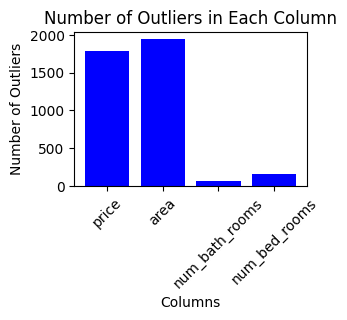

In [ ]:
# Plot bar chart
fig, ax = plt.subplots(figsize=(3,2))
ax.bar(outliers_column, outliers_count, color='blue')
ax.set_title('Number of Outliers in Each Column')
ax.set_xlabel('Columns')
ax.set_ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.show()

#### Outliers on y and index on x

area: 1941 outliers


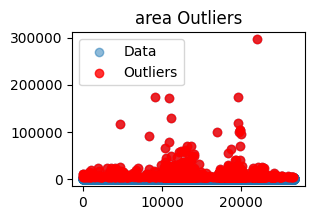

num_bath_rooms: 68 outliers


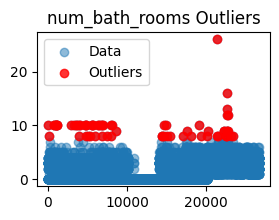

num_bed_rooms: 158 outliers


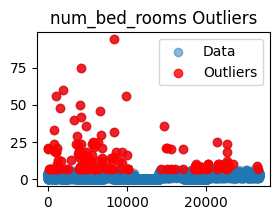

price: 1780 outliers


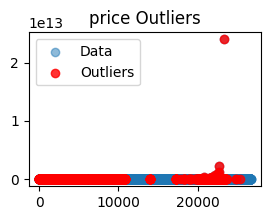

garage: 0 outliers


In [ ]:
# Loop through each column and get the outliers
for column in columns:
    boundaries = get_boundaries(df, column)
    outliers = df[(df[column] > boundaries['upper'])]
    print(f"{column}: {len(outliers)} outliers")

    # Plot the outliers for each column
    if len(outliers) > 0:
        plt.figure(figsize=(3, 2))
        plt.scatter(df.index, df[column], alpha=0.5, label="Data")
        plt.scatter(outliers.index, outliers[column], color='r', alpha=0.8, label="Outliers")
        plt.title(f"{column} Outliers")
        plt.legend()
        plt.show()

####Plotting all outliers against price

area: 1941 outliers


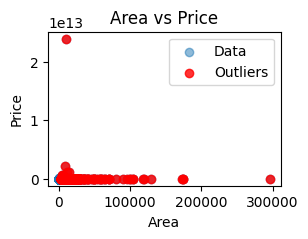

num_bath_rooms: 68 outliers


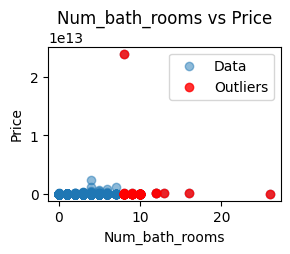

num_bed_rooms: 158 outliers


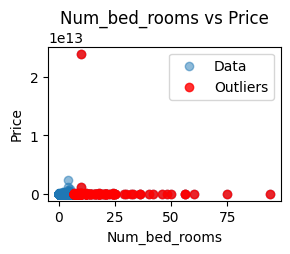

price: 1780 outliers


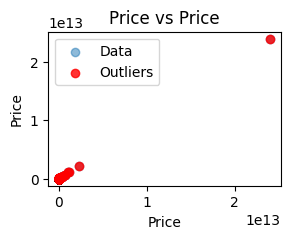

garage: 0 outliers


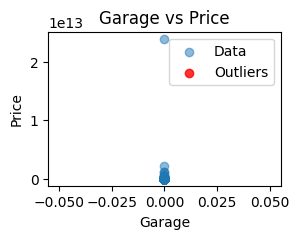

In [ ]:
# Loop through each column and plot against the price
for column in columns:
    boundaries = get_boundaries(df, column)
    outliers = df[(df[column] > boundaries['upper'])]
    print(f"{column}: {len(outliers)} outliers")

    plt.figure(figsize=(3, 2))
    plt.scatter(df[column], df['price'], alpha=0.5, label="Data")
    plt.scatter(outliers[column], outliers['price'], color='r', alpha=0.8, label="Outliers")
    plt.xlabel(column.capitalize())
    plt.ylabel("Price")
    plt.title(f"{column.capitalize()} vs Price")
    plt.legend()
    plt.show()



# b) Are they outliers because of some error: on the property site, in the processing of collecting / cleaning data

# c) If not, is there something interesting about those data points?

## More detailed plots for each column

### **Area**




In [ ]:
print(f"Outlier count: {outlier_area_count}\n Boundary: {boundary_area}")

Outlier count: 1941
 Boundary: 3765.0


Text(0.5, 1.0, 'Area Distribution')

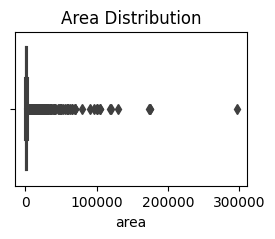

In [ ]:
# Boxplot for area
plt.figure(figsize=(3,2))
sns.boxplot(x = df['area'])
plt.title('Area Distribution')

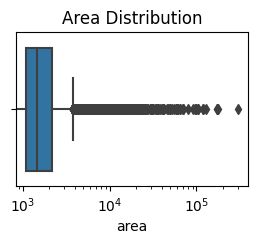

In [ ]:
# plot the boxplot with a log scale on the y-axis
plt.figure(figsize=(3,2))
sns.boxplot(x=df['area'])
plt.title('Area Distribution')
plt.xscale('log')

# display the plot
plt.show()


In [ ]:
# Number of outliers
print(len(df[df['area'] > boundary_area]))

# Outliers
outliers_area = df[df['area'] > boundary_area]
outliers_area.head()

# Selected columns for the DataFrame
selected_cols = ['price', 'area', 'num_bath_rooms', 'num_bed_rooms', 'property_overview', 'building_nature', 'building_type']
area_selected = df.loc[df['area'] > boundary_area, selected_cols]
area_selected.head(6)

1941


,price,area,num_bath_rooms,num_bed_rooms,property_overview,building_nature,building_type
10,70400000.0,4400.0,4.0,4.0,"Amicable environment, appropriate commuting sy...",Residential,Apartment
18,500000.0,3955.0,0.0,0.0,This vacant property is an excellent opportuni...,Commercial,Floor
32,160000000.0,11200.0,0.0,0.0,See this vacant commercial space in Mirpur und...,Commercial,Office
36,81000000.0,11500.0,10.0,21.0,"Welcome to this stunning 11,500 square feet re...",Residential,Building
50,49000000.0,7200.0,0.0,20.0,This building consists of facilities you can t...,Residential,Building
138,87000000.0,4858.0,5.0,5.0,A spacious 4858 Square Feet Duplex in Dhanmond...,Residential,Duplex


I have not managed well with the colors here and it is a bit hard to distinguish some from the others. 

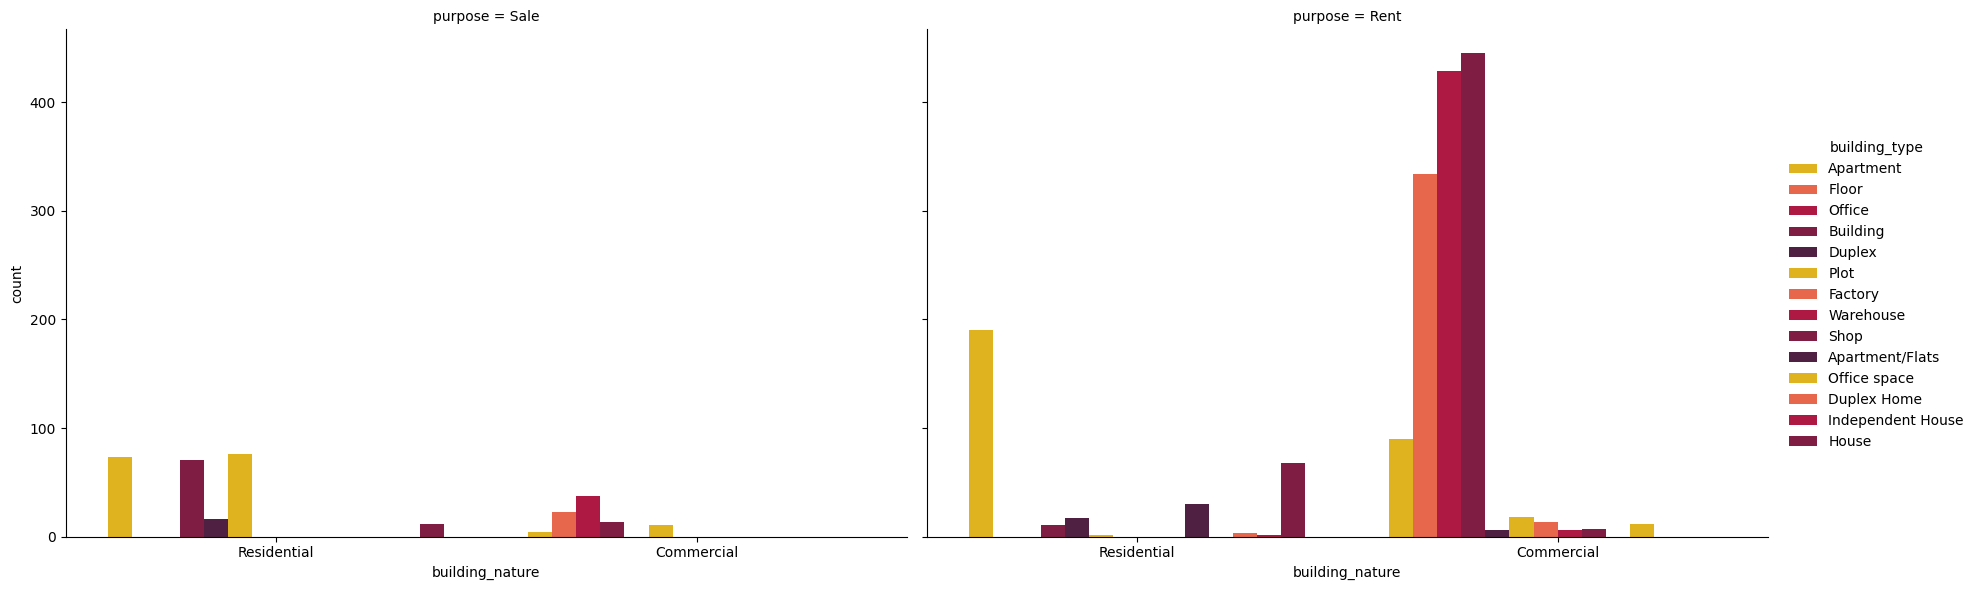

In [ ]:
# Define new color palette
colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845']

# Plot count of building_nature and building_type for outliers_area with new color palette
sns.catplot(x='building_nature', hue='building_type', col='purpose', data=outliers_area, kind='count', height=6, aspect=1.5, palette=colors)


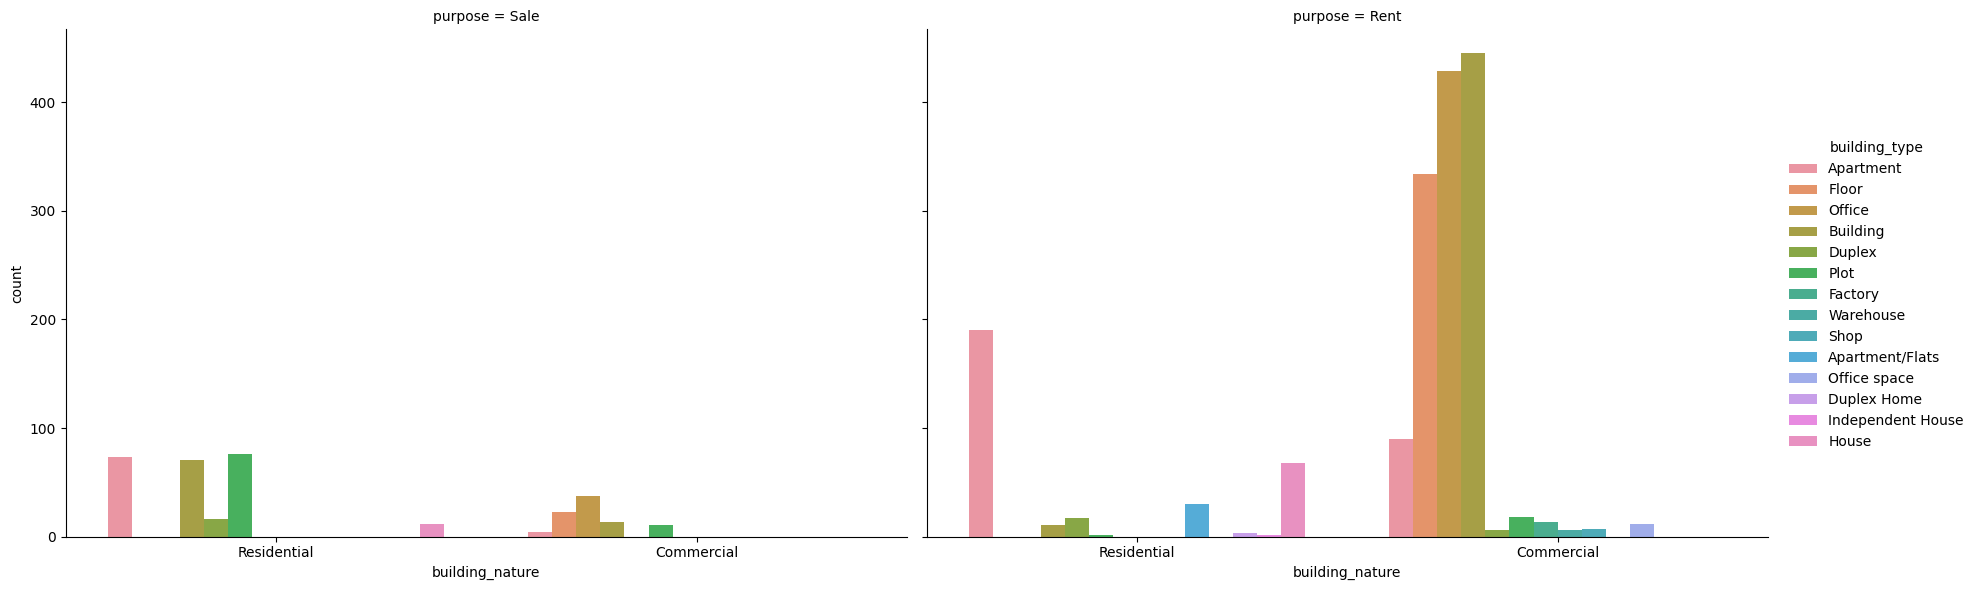

In [ ]:
# The amount of building_nature and building_type for outliers_num_bath_rooms 
sns.catplot(x='building_nature', hue='building_type', col='purpose', data=outliers_area, kind='count', height=6, aspect=1.5)

In [ ]:
print(f"Outlier count: {outlier_area_count}\n Boundary: {boundary_area}")

Outlier count: 1941
 Boundary: 3765.0


#### Summary area:
- Most of them have the purpose: rent.
- Most are commercial
- (Its a little tricky with the colors so please doublecheck following)
- Over 400 buildings
- Over 400 offices 
- Over 300 floors
- Over 200 residential; apartments
- Since most are large buildings with many apartments, a good guess is that the area is accurate




### **Bathrooms**


In [ ]:
print(f"Outlier count: {outlier_num_bath_rooms_count}\n Boundary: {boundary_num_bath_rooms}")

Outlier count: 68
 Boundary: 7.5


Text(0.5, 1.0, 'Bathroom Distribution')

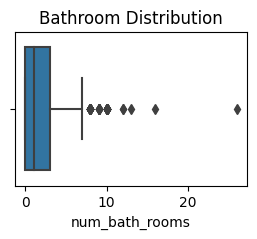

In [ ]:
# To see outliers in boxplot
plt.figure(figsize=(3,2))
sns.boxplot(x=df['num_bath_rooms'])
plt.title('Bathroom Distribution')

In [ ]:
# Number of outliers
print(len(df[df['num_bath_rooms'] > boundary_num_bath_rooms]))

# Outliers
outliers_num_bath_rooms = df[df['num_bath_rooms'] > boundary_num_bath_rooms]
outliers_num_bath_rooms.head()

# Selected columns for the DataFrame
selected_cols = ['price', 'area', 'num_bath_rooms', 'num_bed_rooms', 'property_overview', 'building_nature', 'building_type']
num_bath_rooms_selected = df.loc[df['num_bath_rooms'] > boundary_num_bath_rooms, selected_cols]
num_bath_rooms_selected.head(5)

68


,price,area,num_bath_rooms,num_bed_rooms,property_overview,building_nature,building_type
36,81000000.0,11500.0,10.0,21.0,"Welcome to this stunning 11,500 square feet re...",Residential,Building
174,32000000.0,7150.0,8.0,7.0,It is the exact place if you are looking for o...,Residential,Building
729,85000000.0,10000.0,10.0,19.0,Tired of searching for a building with nice fl...,Residential,Building
811,94500000.0,14740.0,10.0,33.0,"This location is a very well organized area, w...",Residential,Building
974,67000000.0,20685.0,10.0,56.0,If you are looking for a home that will make y...,Residential,Building


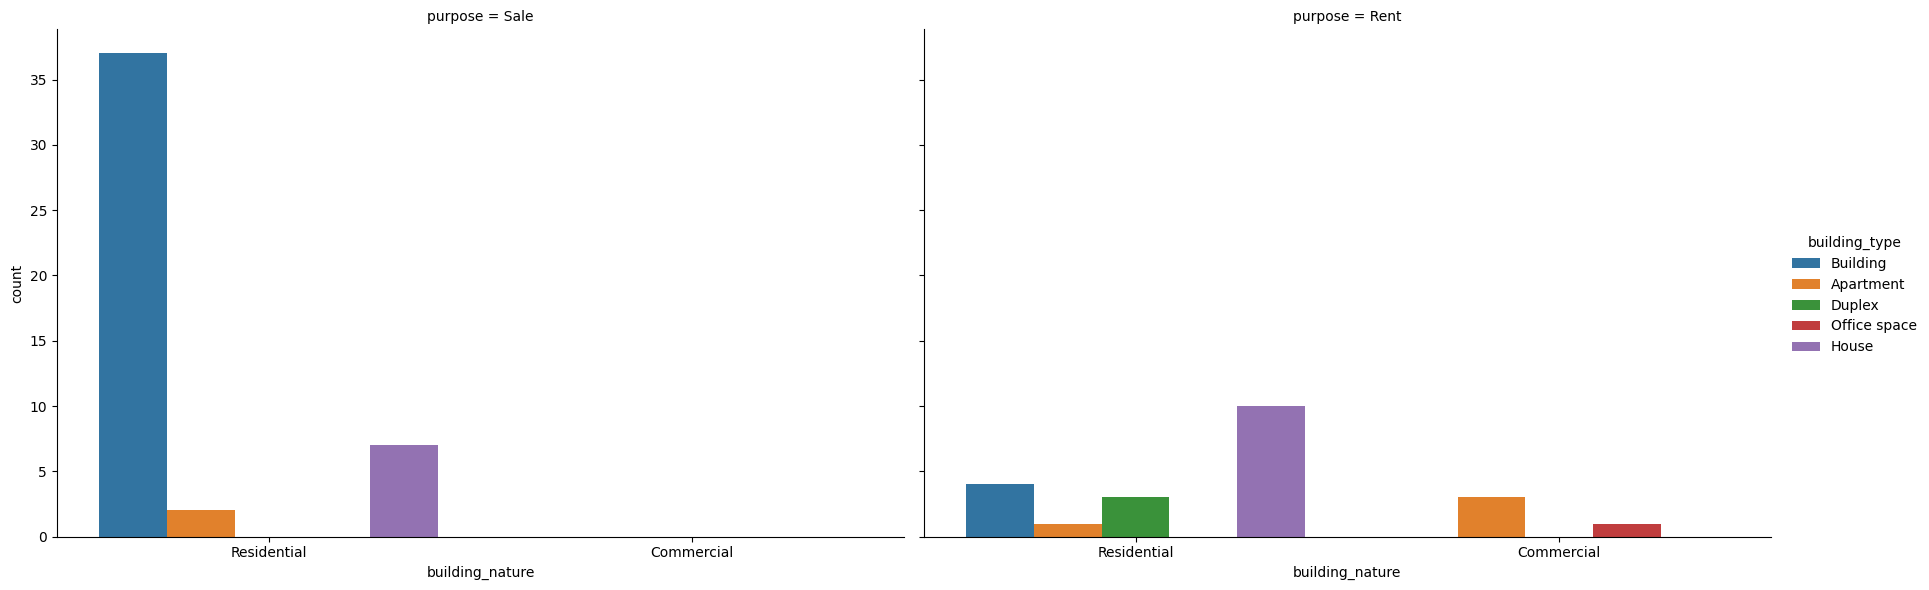

In [ ]:
# The amount of building_nature and building_type for outliers_num_bath_rooms 
sns.catplot(x='building_nature', hue='building_type', col='purpose', data=outliers_num_bath_rooms, kind='count', height=6, aspect=1.5)

In [ ]:
print(f"Outlier count: {outlier_num_bath_rooms_count}\n Boundary: {boundary_num_bath_rooms}")

Outlier count: 68
 Boundary: 7.5


#### Summary num_bath_rooms:
- Most of them are for purpose: Sale
- All in Sale are Residential
- Over 25 are Buildings
- Between 5-10 are Houses
- Since most are large buildings with many apartments, the outliers seem to have accurate number of bathrooms





### Bedrooms

In [ ]:
print(f"Outlier count: {outlier_num_bed_rooms_count}\n Boundary: {boundary_num_bed_rooms}")

Outlier count: 158
 Boundary: 6.0


Text(0.5, 1.0, 'Bedroom Distribution')

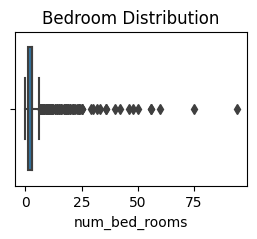

In [ ]:
# To see outliers in boxplot
plt.figure(figsize=(3,2))
sns.boxplot(x=df['num_bed_rooms'])
plt.title('Bedroom Distribution')

In [ ]:
# Number of outliers
print(len(df[df['num_bed_rooms'] > boundary_num_bed_rooms ]))

# Outliers
outliers_num_bed_rooms = df[df['num_bed_rooms'] > boundary_num_bed_rooms]
outliers_num_bed_rooms.head()

# Selected columns for the DataFrame
selected_cols = ['price', 'area', 'num_bath_rooms', 'num_bed_rooms', 'property_overview', 'building_nature', 'building_type', 'purpose']
num_bed_rooms_selected = df.loc[df['num_bed_rooms'] > boundary_num_bed_rooms, selected_cols]
num_bed_rooms_selected.head(5)

158


,price,area,num_bath_rooms,num_bed_rooms,property_overview,building_nature,building_type,purpose
36,81000000.0,11500.0,10.0,21.0,"Welcome to this stunning 11,500 square feet re...",Residential,Building,Sale
50,49000000.0,7200.0,0.0,20.0,This building consists of facilities you can t...,Residential,Building,Sale
174,32000000.0,7150.0,8.0,7.0,It is the exact place if you are looking for o...,Residential,Building,Sale
325,30000000.0,5000.0,0.0,7.0,Find your home in this 5000 Square Feet prope...,Residential,Building,Sale
444,29000000.0,6357.0,0.0,7.0,The house presents a drawing room adjoined to ...,Residential,Apartment,Sale


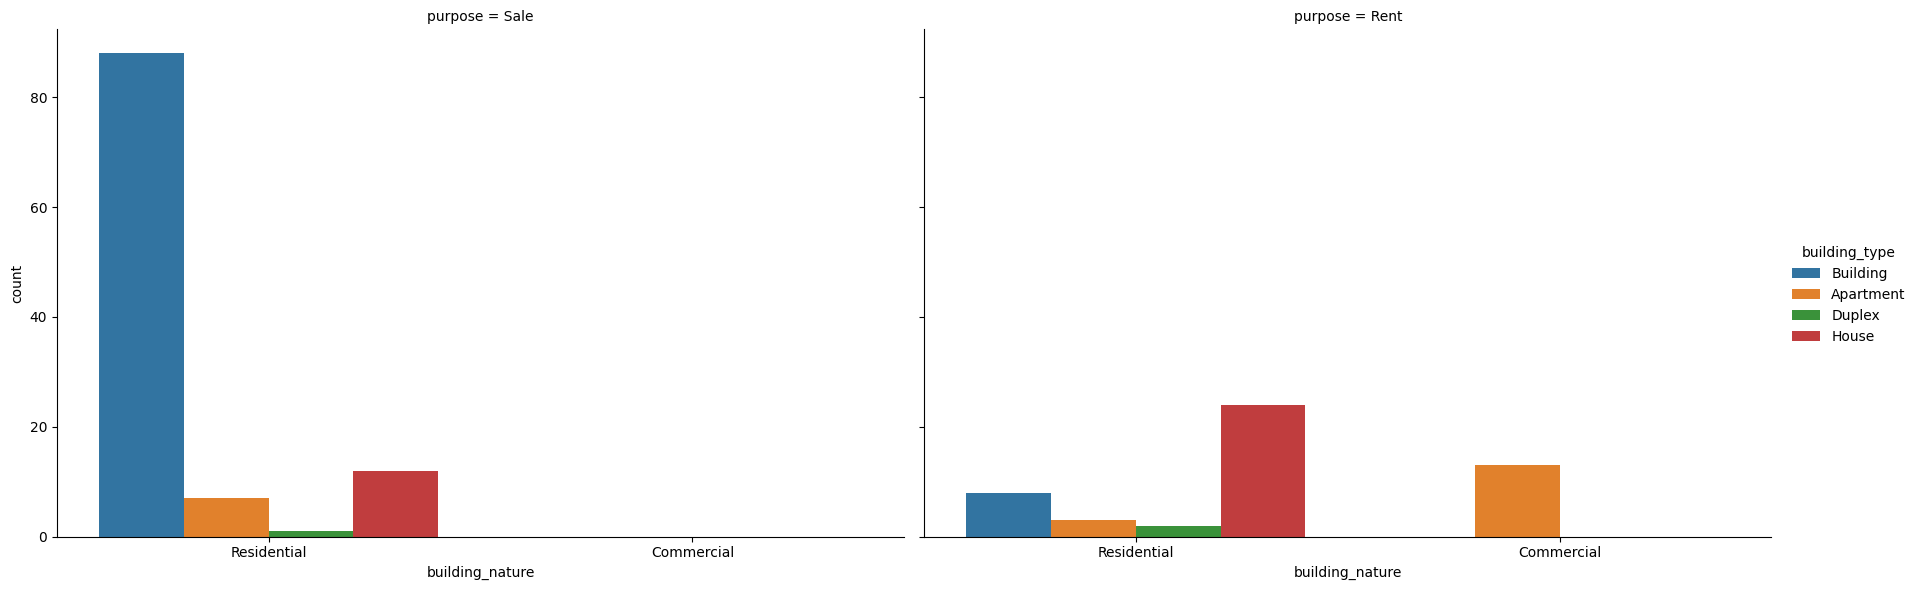

In [ ]:
# The amount of building_nature and building_type for outliers_num_bed_rooms 
sns.catplot(x='building_nature', hue='building_type', col='purpose', data=outliers_num_bed_rooms, kind='count', height=6, aspect=1.5)

In [ ]:
print(f"Outlier count: {outlier_num_bed_rooms_count}\n Boundary: {boundary_num_bed_rooms}")

Outlier count: 158
 Boundary: 6.0


#### Summary num_bed_rooms:
- Most are for Sale
- All in Sale are Residential
- Over 80 in Sale are Buildings
- According to descriptions in property_overview the high number of bathrooms can mostly be explained by big buildings with many apartments





### **Price**

In [ ]:
print(f"Outlier count: {outlier_price_count}\n Boundary: {boundary_price}")

Outlier count: 1780
 Boundary: 17450125.0


Text(0.5, 1.0, 'Price Distribution')

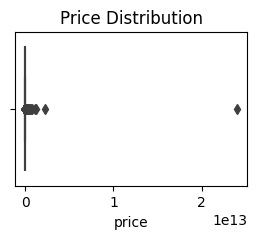

In [ ]:
# To see outliers in boxplot
plt.figure(figsize=(3,2))
sns.boxplot(x=df['price'])
plt.title('Price Distribution')

In [ ]:
# Number of outliers
print(len(df[df['price'] > boundary_price]))

# Outliers
outliers_price = df[df['price'] > boundary_price]
outliers_price.head()

# Selected columns for the DataFrame
selected_cols = ['price', 'area', 'num_bath_rooms', 'num_bed_rooms', 'property_overview', 'building_nature', 'building_type', 'purpose']
num_price_selected = df.loc[df['price'] > boundary_price, selected_cols]
num_price_selected.head(5)

1780


,price,area,num_bath_rooms,num_bed_rooms,property_overview,building_nature,building_type,purpose
1,28900000.0,2464.0,4.0,3.0,Ready to move in somewhere with everything nea...,Residential,Apartment,Sale
3,20000000.0,1920.0,3.0,3.0,Looking for the perfect home that offers a lux...,Residential,Apartment,Sale
6,36500000.0,2468.0,3.0,3.0,Looking for an apartment on a budget? Then thi...,Residential,Apartment,Sale
10,70400000.0,4400.0,4.0,4.0,"Amicable environment, appropriate commuting sy...",Residential,Apartment,Sale
20,28000000.0,2190.0,3.0,3.0,"Welcome to this stunning 3 bedroom, 3 bathroom...",Residential,Apartment,Sale


In [ ]:
# The most extreme outlier
df.loc[df['price'] > 2.01e13, selected_cols]

,price,area,num_bath_rooms,num_bed_rooms,property_overview,building_nature,building_type,purpose
23348,2.400000e+13,10000.0,8.0,10.0,NaN,Residential,Apartment,Sale


The most extreme outlier seems to be unlikely 

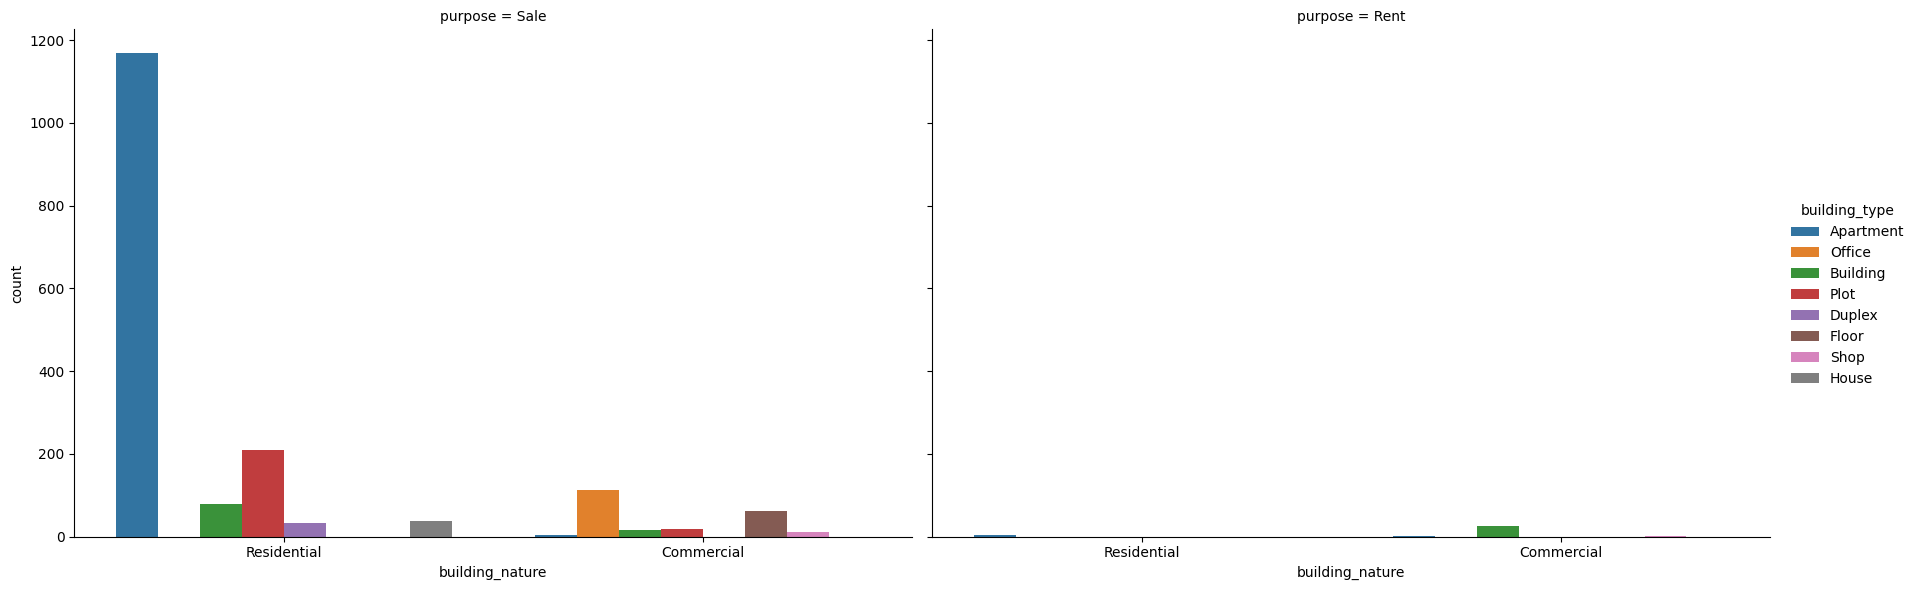

In [ ]:
# The amount of building_nature and building_type for outliers_price 
sns.catplot(x='building_nature', hue='building_type', col='purpose', data=outliers_price, kind='count', height=6, aspect=1.5)

In [ ]:
print(f"Outlier count: {outlier_price_count}\n Boundary: {boundary_price}")

Outlier count: 1780
 Boundary: 17450125.0


#### Summary price:

- Almost all are for Sale
- Most in Sale are Residential
- Almost 1200 are Buildings 
- The most extreme outlier seems unlikely and should probably be taken away. It has index **23348** and has a price of 2.400000e+13 and is an apartment
- The other outliers need someone who knows currency and who knows what can be reasonable that can look at it, but seeing that most of them are large buildings the prices might be explained becuase of that.

### Garage

In [ ]:
print(f"Outlier count: {outlier_garage_count}\n Boundary: {boundary_garage}")

Outlier count: 0
 Boundary: 0.0


#### Summary garage:
There are no outliers in garage

# EDA Summary
- Most outliers can be explained by the number of big buildings that have larger area, more bathrooms and bedrooms as well as a higher price.  
- Large area indicates a high probability to be for Rent and Commercial 
(Please double check the building_types since the colors were difficult to see)
- Large number of bathrooms indicates a high probability to be for Sale and Residential (Buildings with many apartments)
Large number of bedrooms indicates a high probability to be for Sale and Residential (Buildings with many apartments)
- Large price indicates a high probability to be for Sale and Residential 
(Buildings with many apartments)
- The most extreme outlier in 'price' seems unlikely and should probably be taken away. It has index **23348** and has a price of 2.400000e+13 and is an apartment. It is very far from all the others and could maybe have an unwanted effect on the dataset.
 
